# Copier: DNA Replication

Similarly to the self-assembly model, two monomers drawn from a pool containing two types of monomers can combine to form four different dimers. Suppose you wish to make a copy of this dimer, as in DNA replication. This model starts in state 1 and ends in state 3. The parameters of this model are as follows. 

$c_{m}$ is the monomer concentration

$c_{d}$ is the dimer concentration

$k_{B}$ is the bonding rate

$\epsilon$ is the interaction energy between unlike monomers

$\epsilon-\delta$ is the interaction energy between like monomers
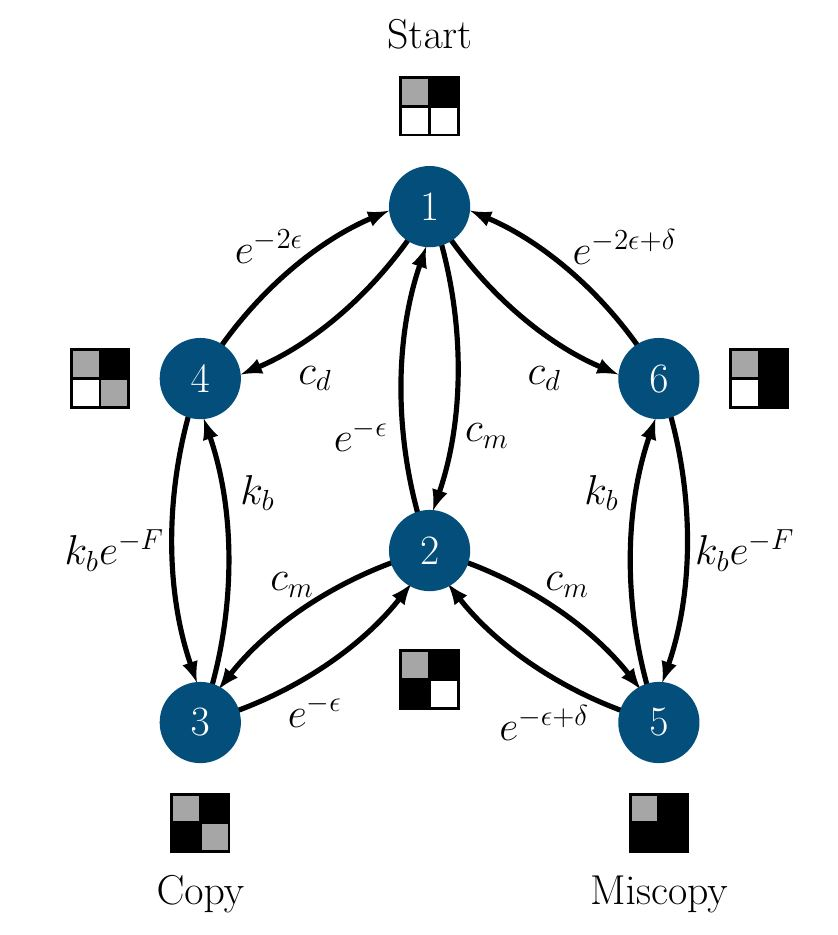
The transition matrix of this model is
\begin{equation}
W = \left(
\begin{matrix}
-c_{m}-2c_{d} & e^{-\epsilon} & 0 & e^{-2\epsilon} & 0 & e^{-2\epsilon+\delta} \\
c_{m} & -2c_{m}-e^{-\epsilon} & e^{-\epsilon} & 0 & e^{-\epsilon+\delta} & 0 \\
0 & c_{m} & -k_{b}-e^{-\epsilon} & k_{b}e^{-F} & 0 & 0 \\
c_{d} & 0 & k_{b} & -k_{b}e^{-F}-e^{-2\epsilon} & 0 & 0 \\
0 & c_{m} & 0 & 0 & -k_{b}-e^{-\epsilon+\delta} & k_{b}e^{-F} \\
c_{d} & 0 & 0 & 0 & k_{b} & -k_{b}e^{-F}-e^{-2\epsilon+\delta}
\end{matrix}\right)
\end{equation}

Let us now assume that we want this ratchet to produce large amounts of work/power very quickly and with minimal cost. The speed, dissipation, and yield can be quantified over a path-- a sequence of time-ordered states representing the path a particle takes between these two electrodes and the charge of that particle.
For some path $\mathcal{C}_{n}=x_{0},x_{1},x_{2},...,x_{n-1},x_{n}$, the speed of that path is given by the sum of the mean time waiting in each state along the path:
\begin{equation}
\langle 1 / \tau \rangle_{\mathcal{C}_{n}}=\sum_{i=0}^{n} \frac{1}{w_{x_{i}}}
\end{equation}
The entropy dissipated by traversal of a single path is given by the negative of the entropy flow:
\begin{equation}
-s_{e}[\mathcal{C}_{n}]=-\ln \frac{\prod_{i=1}^{n} w(x_{i} \vert x_{i-1})}{\prod_{j-1}^{n} w(x_{j-1} \vert x_{j})}
\end{equation}
The yield can be defined by the probability of a path.
However, we are interested not only in the yield ut also in the ratio of correct yield.
We must therefore generated two sets of paths: a set that terminates in the correct product and a set that terminates in the incorrect product.
We can take the ratio of the probability of the correct to the incorrect paths.

These path-level observables can be averaged over a group of paths, an ensemble.
We are interested in the trend of these observables in time, so we will create groups of paths that are binned in time based on their mean occurrence time $\langle \tau \rangle_{\mathcal{C}_{n}}$. The value of each paths' mean occurrence time will fall into a single uniform-length ($\Delta t$) time bin. The observables $\mathcal{O}_{\mathcal{C}_{n}}$ of these paths can then be averaged to a single value representing that point in time:
\begin{equation}
\langle \mathcal{O} \rangle_{t}=\sum_{t}^{t+\Delta t} \mathcal{O}_{\mathcal{C}_{n}} p(\mathcal{C}_{n},\langle \tau \rangle_{\mathcal{C}_{n}})
\end{equation}
This yields a time series of values of each observable. These time series are plotted below for the speed, dissipation, and yield.

Number of correct paths is 492
Number of incorrect paths is 492
Length of longest path is 10


Text(0.5, 0, 'Time')

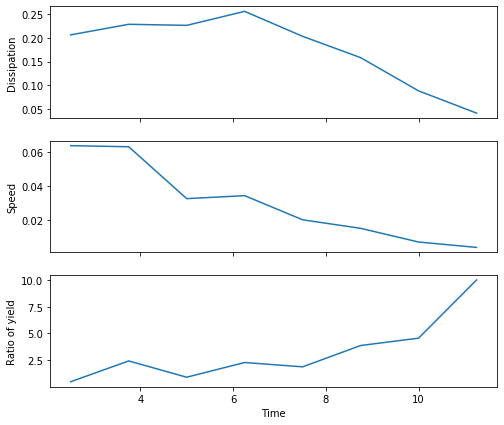

In [15]:
import math
import matplotlib
import matplotlib.pyplot as plt

# Parameter values
kb = 1
F = 1
eps = 1
delta = 1
cd = 1
cm = 1

# Size of time bins
dt = 1.25

#Declarations
temp = []
paths = []
allpaths_cor = []
allpaths_inc = []
newpaths = []
prob_cor = []
prob_inc = []
prob = []
time = []
speed = []
time_inc = []
diss = []
R = []
wx = []
t_time = []
t_speed = []
t_diss = []
t_mtime = []
t_prob_cor = []
t_prob_inc = []
t_ratio = []
occ = []
ef = []
probsy = []
probsn = []
probs = []

# Path generation
paths = [[1,2],[1,4],[1,6]]
nmax = 10
npath_cor = 0
npath_inc = 0
for i in range(2,nmax):
    newpaths.clear()
    for j in range(0,len(paths),1):
        if (paths[j][-1] == 1):
            temp.clear()
            temp = list(paths[j])
            temp.append(2)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(4)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(6)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 2):
            temp.clear()
            temp = list(paths[j])
            temp.append(1)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(3)
            newpaths.append(list(temp))
            allpaths_cor.append(list(temp))
            npath_cor+=1
            del temp[-1]
            temp.append(5)
            newpaths.append(list(temp))
            allpaths_inc.append(list(temp))
            npath_inc+=1
        elif (paths[j][-1] == 3):
            temp.clear()
            temp = list(paths[j])
            temp.append(2)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(4)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 4):
            temp.clear()
            temp = list(paths[j])
            temp.append(1)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(3)
            newpaths.append(list(temp))
            allpaths_cor.append(list(temp))
            npath_cor+=1
        elif (paths[j][-1] == 5):
            temp.clear()
            temp = list(paths[j])
            temp.append(2)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(6)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 6):
            temp.clear()
            temp = list(paths[j])
            temp.append(1)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(5)
            newpaths.append(list(temp))
            allpaths_inc.append(list(temp))
            npath_inc+=1
        else:
            print("Invalid state!\n")
    paths.clear()
    paths = list(newpaths)
            
print("Number of correct paths is",npath_cor)
print("Number of incorrect paths is",npath_inc)
print("Length of longest path is",len(allpaths[-1]))
#print(allpaths)

# Rate matrix and escape rates
R = [[float(0)]*6]*6
R[0]=[float(0),float(cm),float(0),float(cd),float(0),float(cd)]#1
R[1]= [float(math.exp(-eps)),float(0),float(cm),float(0),float(cm),float(0)]#2
R[2]= [float(0),float(math.exp(-eps)),float(0),float(kb),float(0),float(0)]#3
R[3]= [float(math.exp(-2*eps)),float(0),float(kb*math.exp(-F)),float(0),float(0)]#4
R[4] = [float(0),float(math.exp(-eps+delta)),float(0),float(0),float(0),float(kb)]#5
R[5] = [float(math.exp(-2*eps+delta)),float(0),float(0),float(0),float(kb*math.exp(-F)),float(0)]#6
wx.append(float((2*cd)+cm))#1
wx.append(float((2*cm)+math.exp(-eps)))#2
wx.append(float(kb+math.exp(-eps)))#3
wx.append(float((kb*math.exp(-F))+math.exp(-2*eps)))#4
wx.append(float(kb+math.exp(-eps+delta)))#5
wx.append(float(math.exp(-2*eps+delta)+(kb*math.exp(-F))))#6

# Observable determination along paths
margp = 1
time = []
speed = []
diss = []
prob = []
prob_cor = []
prob_inc = []
time_inc = []
for i in range(0,len(allpaths_cor),1):
    time.append(float(0))
    for j in range(0,len(allpaths_cor[i]),1):
        time[i]+=(1/wx[int(allpaths_cor[i][j]-1)])
    speed.append(float(1/time[i]))
    prob_cor.append(float(1))
    for j in range(1,len(allpaths_cor[i]),1):
        prob_cor[i] = prob_cor[i] * float(R[int(allpaths_cor[i][j-1]-1)][int(allpaths_cor[i][j]-1)]/wx[int(allpaths_cor[i][j-1]-1)])
    diss.append(float(1))
    for j in range(1,len(allpaths_cor[i]),1):
        extra = float(R[int(allpaths_cor[i][j-1]-1)][int(allpaths_cor[i][j]-1)])
        diss[i]*=float(extra)
        extra = float(R[int(allpaths_cor[i][j]-1)][int(allpaths_cor[i][j-1]-1)])
        diss[i]/=float(extra)
        #diss[i]-=float(math.log(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)]/R[int(allpaths[i][j]-1)][int(allpaths[i][j-1]-1)]))
    diss[i] = float(math.log(diss[i]))
for i in range(0,len(allpaths_inc),1):
    prob_inc.append(float(1))
    for j in range(1,len(allpaths_inc[i]),1):
        prob_inc[i] = prob_inc[i] * float(R[int(allpaths_inc[i][j-1]-1)][int(allpaths_inc[i][j]-1)]/wx[int(allpaths_inc[i][j-1]-1)])
    time_inc.append(float(0))
    for j in range(0,len(allpaths_cor[i]),1):
        time_inc[i]+=float(1/wx[int(allpaths_inc[i][j]-1)])

sumpr = float(0)
prob = [float(0)]*len(prob_cor)
for i in range(0,len(allpaths_cor),1):
    sumpr+=float(prob_cor[i])
for i in range(0,len(allpaths_cor),1):
    prob[i] = float(prob_cor[i]/sumpr)
    
# Average to time ensemble
nt = math.ceil(max(time)/dt)
t_time = [float(0)]*(nt+1)
for i in range(0,nt+1):
    t_time[i]=i*dt
#t_time = list(range(0,dt*nt,dt))
t_speed = [float(0)]*nt
t_diss = [float(0)]*nt
t_mtime = [float(0)]*nt
t_prob_inc = [float(0)]*nt
t_prob_cor = [float(0)]*nt
t_ratio = [float(0)]*nt
for i in range(0,len(t_time)-1,1):
    occ.clear()
    ef.clear()
    probs.clear()
    probsy.clear()
    for j in range(0,len(allpaths_cor),1):
        if (time[j] >= t_time[i]) and (time[j] <= t_time[i+1]):
            occ.append(float(time[j]))
            ef.append(float(diss[j]))
            probs.append(float(prob[j]))
            probsy.append(float(prob_cor[j]))
    t_speed[i] = float(0)
    t_diss[i] = float(0)
    t_mtime[i] = float(0)
    t_prob_cor[i] = float(0)
    for j in range(0,len(occ),1):
        extra = float(probs[j] * occ[j])
        t_mtime[i]+=float(extra)
        if occ[j] > 0:
            extra=float(probs[j]/occ[j])
            t_speed[i]+=float(extra)
        extra=float(probs[j] * ef[j])
        t_diss[i]+=float(extra)
        t_prob_cor[i]+=float(probsy[j])
for i in range(0,len(t_time)-1,1):
    probsn.clear()
    for j in range(0,len(allpaths_inc),1):
        if (time_inc[j] >= t_time[i]) and (time_inc[j]<=t_time[i+1]):
            probsn.append(float(prob_inc[j]))
    t_prob_inc[i] = float(0)
    for j in range(0,len(probsn),1):
        t_prob_inc[i]+=float(probsn[j])
    t_ratio[i] = float(0)
    if t_prob_inc[i] > 0:
        t_ratio[i] = float(t_prob_cor[i]/t_prob_inc[i])
    else:
        t_ratio[i] = 10
        
# Time ensemble neglecting zero elements
finaltimes = list(t_time)
del finaltimes[0]
for i in range(len(t_speed)-1,-1,-1):
    if t_mtime[i] == 0:
        del t_speed[i]
        del t_diss[i]
        del t_mtime[i]
        del t_ratio[i]
        del finaltimes[i]

# Plots
fig = plt.figure(figsize=(8,7))
ax = fig.subplots(sharex=True,sharey=False,ncols=1,nrows=3)
plt.sca(ax[0])
ax[0].plot(finaltimes,t_diss)
ax[0].set_ylabel('Dissipation')
plt.sca(ax[1])
ax[1].plot(finaltimes,t_speed)
ax[1].set_ylabel('Speed')
plt.sca(ax[2])
ax[2].plot(finaltimes,t_ratio)
ax[2].set_ylabel('Ratio of yield')
ax[2].set_xlabel('Time')

The speed, dissipation, and ratio of correct yield each have a time series, shown above. The dissipation decreases in time, the speed decreases in time, and the ratio of the correct yield increases in time. This means that a good proportion of yield can be attained with minimal dissipative losses but only if the system operates slowly.